<a href="https://colab.research.google.com/github/jcdumlao14/Supervised-Learning-Algorithms--Classification/blob/main/SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine (SVM)**

**Classification**
--
Breast Cancer Datasets

# **What Does Support Vector Machine (SVM) Mean?**

A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible. SVMs are used in text categorization, image classification, handwriting recognition and in the sciences.

A support vector machine is also known as a support vector network (SVN).

References: https://www.techopedia.com/

# **What are Support Vectors?**

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

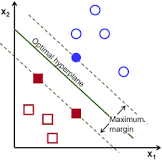

Reference:https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47#:~:text=Support%20vectors%20are%20data%20points,help%20us%20build%20our%20SVM.

A **hyperplane** is a decision boundary that differentiates the two classes in SVM. A data point falling on either side of the hyperplane can be attributed to different classes. The dimension of the hyperplane depends on the number of input features in the dataset.

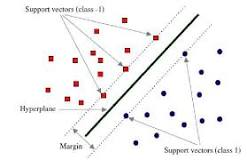

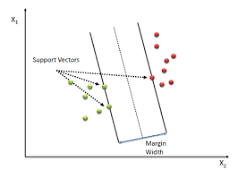

Reference: https://www.analyticsvidhya.com/blog/2021/03/beginners-guide-to-support-vector-machine-svm/#:~:text=A%20hyperplane%20is%20a%20decision,input%20features%20in%20the%20dataset.

# **Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# **Loading the Data**

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv') 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [37]:
df['diagnosis'] = df['diagnosis'].map({'M': 1,'B':2}) #Label values -1 for Malignant and 2 for benign
labels = df['diagnosis'].tolist()
df['Class'] = labels 
df = df.drop(['id','diagnosis'], axis = 1) # Dropping uncessary columns
df.head() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,2
1,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,2
2,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,2
3,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,2
4,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,1


In [38]:
target_names = ["",'M','B']
df['attack'] = df.Class.apply(lambda x: target_names[x])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class,attack
0,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,...,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,2,B
1,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,2,B
2,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,2,B
3,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,2,B
4,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,1,M


In [39]:
df1 = df[df.Class ==1]
df2 = df[df.Class ==2]

In [41]:
df1 # we could see the all 'M' Malignant

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class,attack
4,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,136.80,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420,1,M
6,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.1166,0.1922,0.3215,0.16280,0.2572,0.06637,1,M
7,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,107.30,740.4,0.1610,0.4225,0.5030,0.22580,0.2807,0.10710,1,M
9,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,...,91.93,591.7,0.1385,0.4092,0.4504,0.18650,0.5774,0.10300,1,M
10,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,...,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,15.75,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,119.40,915.3,0.1550,0.5046,0.6872,0.21350,0.4245,0.10500,1,M
393,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,129.70,1175.0,0.1395,0.3055,0.2992,0.13120,0.3480,0.07619,1,M
394,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,184.20,2403.0,0.1228,0.3583,0.3948,0.23460,0.3589,0.09187,1,M
395,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,1,M


In [42]:
df2 #we could see all the 'B' Benign

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class,attack
0,13.160,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,...,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,2,B
1,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,2,B
2,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,2,B
3,12.000,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,2,B
5,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763,2,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,10.510,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,0.07782,...,72.62,374.4,0.1300,0.2049,0.12950,0.06136,0.2383,0.09026,2,B
389,14.640,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,106.00,831.0,0.1142,0.2070,0.24370,0.07828,0.2455,0.06596,2,B
390,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,0.08261,...,58.08,249.8,0.1630,0.4310,0.53810,0.07879,0.3322,0.14860,2,B
392,11.930,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.02008,0.1688,0.06194,...,87.54,583.0,0.1500,0.2399,0.15030,0.07247,0.2438,0.08541,2,B


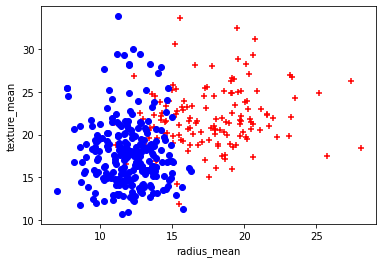

In [43]:
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.scatter(df1['radius_mean'],df1['texture_mean'], color = 'red', marker ='+')
plt.scatter(df2['radius_mean'],df2['texture_mean'], color = 'blue', marker ='o')

# **Split the data into Train and Test Sets**

In [65]:
# The train to test ratio should be 80:20 and the random_state should be 0.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =20, random_state=0)
X_train.shape, X_test.shape

((378, 30), (20, 30))

In [66]:
X = df.drop(['Class','attack'], axis = 'columns')
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,...,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
1,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757
2,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147
3,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194
4,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420


In [67]:
y = df.Class
y

0      2
1      2
2      2
3      2
4      1
      ..
393    1
394    1
395    1
396    2
397    1
Name: Class, Length: 398, dtype: int64

In [68]:
print(len(X_train))
print(len(X_test))

378
20


In [69]:
model = SVC(kernel = 'linear')

In [70]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [71]:
predictions = model.predict(X_test)
print(predictions)

[1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1]


In [74]:
percentage = model.score(X_test,y_test)

In [75]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage * 100}%")

Confusion Matrix
[[11  2]
 [ 1  6]]
Test Set: 20
Accuracy = 85.0%


Thus it seems our trained model performed better on the testing set than the training set.